<a href="https://colab.research.google.com/github/AyushAI/NextEra-LSTM/blob/master/NextEra_Supplies_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [16]:
#importing all the required libraries for data manipulation and analysis
!pip install xlrd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Converting ".xls" to ".csv"

In [17]:
sales_data = pd.read_excel('/content/NextEra Supplies.xlsx')


In [18]:
sales_data.to_csv("NextEra Supplies.csv", index = None, header = True) #converting excel to csv
df = pd.DataFrame(pd.read_csv("NextEra Supplies.csv"))

# Data Exploring

In [19]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [20]:
# df.shape
print("This dataset has\nColumns: {}\nRows: {}".format(df.shape[0],df.shape[1]))

This dataset has
Columns: 9994
Rows: 21


In [21]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [23]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data Cleaning

In [24]:
df.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
print(df.isnull().sum())
print("------------------------")
print("Total             {}".format(df.isnull().sum().sum()))

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
------------------------
Total             0


In [26]:
sales_data = df.dropna(axis=1)

In [27]:
print(sales_data.isnull().sum())
print("------------------------")
print("Total             {}".format(sales_data.isnull().sum().sum()))

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
------------------------
Total             0


In [28]:
#checking if dataset has any duplicate rows
sales_data.duplicated().sum()

0

In [29]:
#converting the Dates in proper datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors = 'coerce')
sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'], errors = 'coerce')

In [30]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [31]:
sales_data['Year'] = sales_data['Order Date'].dt.year #extracting the order year from orderdate column
sales_data['Month'] = sales_data['Order Date'].dt.month  #extracting the order month from orderdate column
sales_data['Day'] = sales_data['Order Date'].dt.day   #extracting the order day from orderdate column
sales_data["Month_year"] = sales_data['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

In [32]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [33]:
#exporting the cleaned data into a csv file so we can perform operations on that
sales_data.to_csv("NextEra_Supplies_Cleaned.csv")

In [34]:
sales_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year',
       'Month', 'Day', 'Month_year'],
      dtype='object')

# Exploring the Dataset

In [35]:
sales_data["Country"].unique()

array(['United States'], dtype=object)

In [36]:
print("NextEra Supplies has its reach over {} countries".format(sales_data["Country"].nunique()))

NextEra Supplies has its reach over 1 countries


In [37]:
sales_data["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [38]:
sales_data["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

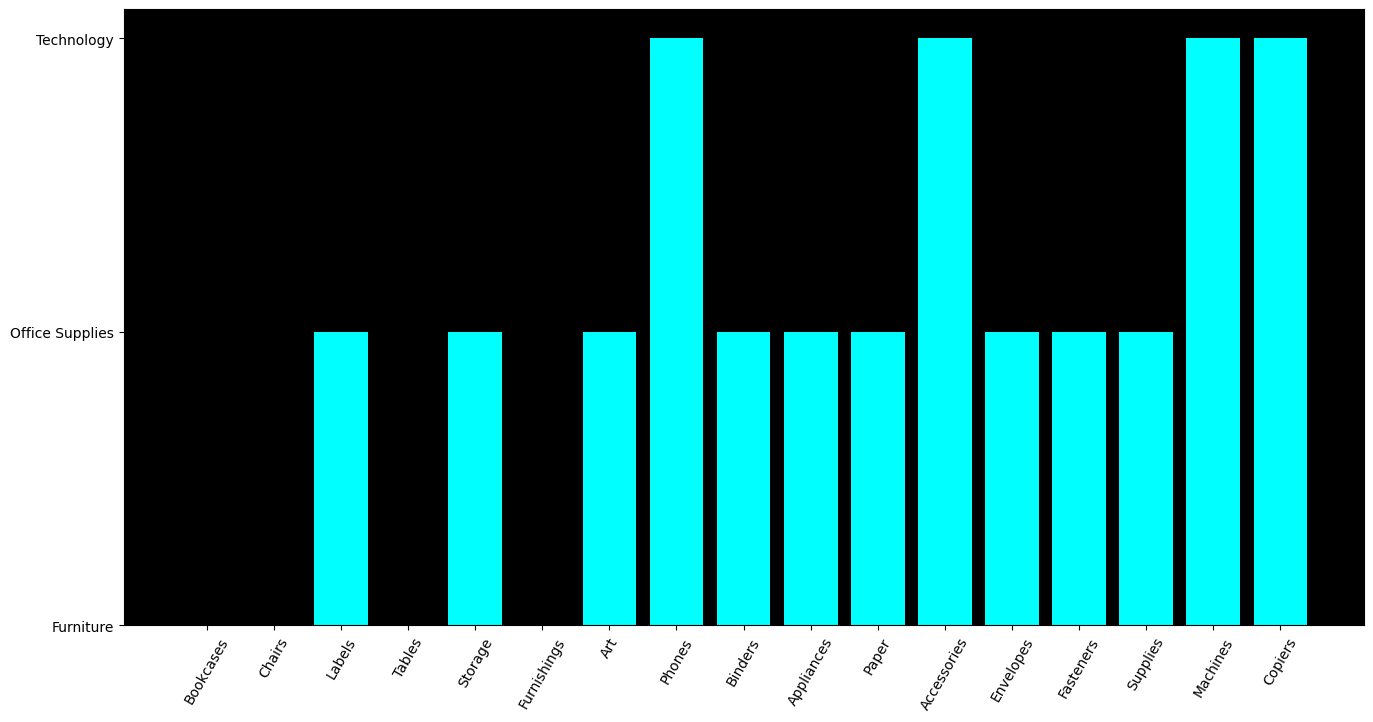

In [56]:
plt.figure(figsize=(16, 8))
plt.bar('Sub-Category', 'Category', data=sales_data, color='aqua')
plt.xticks(rotation=60, color='black')  # Set x-axis tick labels to black
plt.yticks(color='black')  # Set y-axis tick labels to black
plt.gca().set_facecolor('black')  # Set the background color to black
plt.show()


In [42]:
group_by_sub_category = sales_data.groupby("Sub-Category")
group_by_sub_category.first()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day,Month_year
Sub-Category,,,,,,,,,,,,,,,,,,,,,
Accessories,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,Technology,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.5700,3,0.00,11.7741,2016,1,16,2016-01
Appliances,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,2014,6,9,2014-06
Art,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,Newell 322,7.2800,4,0.00,1.9656,2014,6,9,2014-06
Binders,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Office Supplies,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,2014,6,9,2014-06
Bookcases,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,2016-11
Chairs,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,2016-11
Copiers,336,CA-2015-137946,2015-09-01,2015-09-04,Second Class,DB-13615,Doug Bickford,Consumer,United States,Los Angeles,...,Technology,Hewlett Packard LaserJet 3310 Copier,959.9840,2,0.20,335.9944,2015,9,1,2015-09
Envelopes,31,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,Office Supplies,Poly String Tie Envelopes,3.2640,2,0.20,1.1016,2015,9,17,2015-09
Fasteners,54,CA-2016-105816,2016-12-11,2016-12-17,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,...,Office Supplies,Advantus Push Pins,15.2600,7,0.00,6.2566,2016,12,11,2016-12


In [43]:
profit = sales_data.groupby("Sub-Category")['Profit']
profit.first()

,Profit
Sub-Category,
Accessories,11.7741
Appliances,34.4700
Art,1.9656
Binders,5.7825
Bookcases,41.9136
Chairs,219.5820
Copiers,335.9944
Envelopes,1.1016
Fasteners,6.2566


In [44]:
sales = sales_data.groupby("Sub-Category")['Sales']
sales.first()

,Sales
Sub-Category,
Accessories,90.5700
Appliances,114.9000
Art,7.2800
Binders,18.5040
Bookcases,261.9600
Chairs,731.9400
Copiers,959.9840
Envelopes,3.2640
Fasteners,15.2600


# Sales Prediction Using Machine Learning

In [48]:
df = pd.read_csv("/content/NextEra_Supplies_Cleaned.csv")

In [49]:
df['Order Date'].min()

'2014-01-03'

In [50]:
df['Order Date'].max()

'2017-12-30'

In [51]:
#grouping the data according to the month and year
df_month_year = df.groupby('Month_year').sum()['Sales'].reset_index()
df_month_year

,Month_year,Sales
0,2014-01,14236.8950
1,2014-02,4519.8920
2,2014-03,55691.0090
3,2014-04,28295.3450
4,2014-05,23648.2870
5,2014-06,34595.1276
6,2014-07,33946.3930
7,2014-08,27909.4685
8,2014-09,81777.3508
9,2014-10,31453.3930


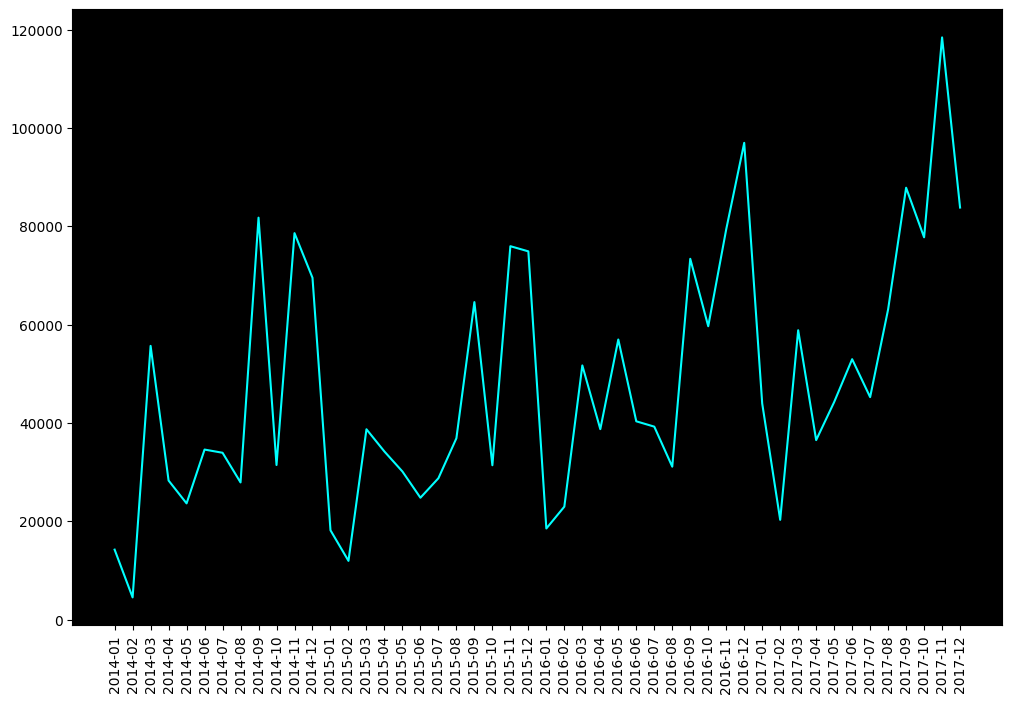

In [55]:
# Visualizing the monthly trend with customized colors
plt.figure(figsize=(12, 8))
plt.plot(df_month_year['Month_year'], df_month_year['Sales'], color='aqua')
plt.xticks(rotation='vertical', color='black')  # Setting x-axis labels to black
plt.yticks(color='black')  # Setting y-axis labels to black
plt.gca().set_facecolor('black')  # Setting the background color to black
plt.show()


In [57]:
#Here we can see, there is fluctuation of sales trend throughout the year, but overall the sales are increasing

In [58]:
df1 = df.groupby('Order Date').sum()['Sales'].reset_index()
df1

,Order Date,Sales
0,2014-01-03,16.4480
1,2014-01-04,288.0600
2,2014-01-05,19.5360
3,2014-01-06,4407.1000
4,2014-01-07,87.1580
...,...,...
1232,2017-12-26,814.5940
1233,2017-12-27,177.6360
1234,2017-12-28,1657.3508
1235,2017-12-29,2915.5340


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  1237 non-null   object 
 1   Sales       1237 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.5+ KB


In [66]:
df_final= df.groupby('Order Date').sum()['Sales'].reset_index()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  1237 non-null   object 
 1   Sales       1237 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.5+ KB


In [67]:
#scaling the data to the range of -1 to 1
#it reduces the errors and fits to the model prefectly
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_final= scaler.fit_transform(np.array(df_final['Sales']).reshape(-1, 1))

In [68]:
df_final

array([[0.00051319],
       [0.01017748],
       [0.00062306],
       ...,
       [0.05889856],
       [0.10366629],
       [0.02532549]])

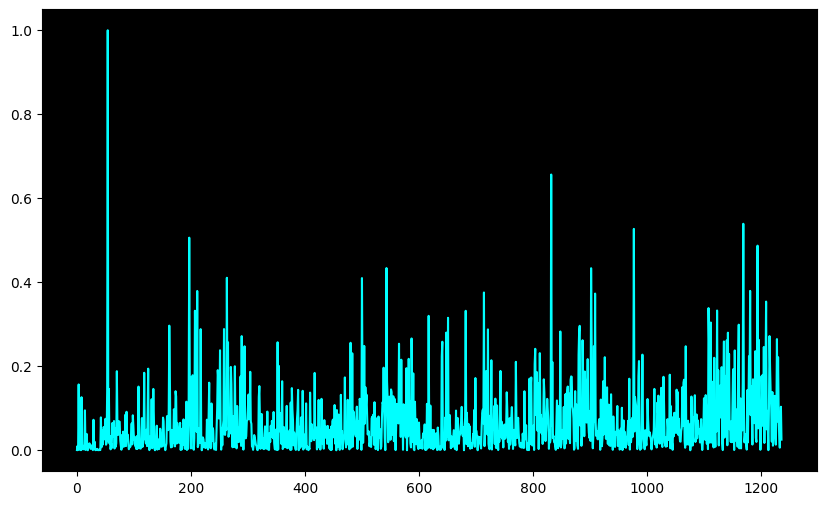

In [71]:
import matplotlib.pyplot as plt

# Plotting with custom styling
plt.figure(figsize=(10, 6))
plt.plot(df_final, color='aqua')  # Line color set to aqua
plt.gca().set_facecolor('black')  # Set the background color to black
plt.xticks(color='black')  # X-axis labels in black
plt.yticks(color='black')  # Y-axis labels in black
plt.show()


In [72]:
#splitting the data into training and test data set
training_size = int(len(df_final)*0.75)
test_size = len(df_final)-training_size

train_data = df_final[0:training_size, :]
test_data = df_final[training_size:len(df_final), :1]

In [73]:
training_size, test_size

(927, 310)

In [74]:
def create_dataset(dataset, time_step=1):
    data_x, data_y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] #converting the data into a matrix for fast computation
        data_x.append(a)
        data_y.append(dataset[i + time_step, 0])
    return np.array(data_x), np.array(data_y) #numpy array for training and test columns

In [75]:
#creating the dataset with timestep of 10
time_step = 10
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [76]:
print(x_train)

[[0.00051319 0.01017748 0.00062306 ... 0.00028163 0.12637641 0.00213256]
 [0.01017748 0.00062306 0.15673807 ... 0.12637641 0.00213256 0.00526336]
 [0.00062306 0.15673807 0.00302914 ... 0.00213256 0.00526336 0.01060104]
 ...
 [0.02745979 0.02596517 0.05265324 ... 0.03170129 0.00969468 0.03011935]
 [0.02596517 0.05265324 0.07392108 ... 0.00969468 0.03011935 0.16428948]
 [0.05265324 0.07392108 0.07359081 ... 0.03011935 0.16428948 0.0375031 ]]


In [77]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(916, 10)
(916,)
(299, 10)
(299,)


# Applying LSTM for Sales Prediction

In [78]:
#reshaping the x_train and x_test which is required for our LSTM....samples, timesteps and features
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

*Creating an LSTM Model*

In [79]:
#Creating the LSTM model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

In [80]:
n_steps = 10
n_features = 1
#the sequential function processess the data as a stream of sequential integers
model = Sequential()
#defining the model
model.add(LSTM(50, return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse' )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0065 - val_loss: 0.0084
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0058 - val_loss: 0.0076
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0065 - val_loss: 0.0076
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0073 - val_loss: 0.0079
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0052 - val_loss: 0.0074
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0064 - val_loss: 0.0077
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0067 - val_loss: 0.0085
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0059 - val_loss: 0.0074
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0063 - val_loss: 0.0076
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0057 - val_loss: 0.0077
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0077 - val_loss: 0.0078
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

In [83]:
import tensorflow as tf

In [84]:
#lets perform the predictions and check performance metrices
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [85]:
#transform them back to theiroriginal form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [86]:
#calculating RMSE performance metrices
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

1595.6233222670758

In [87]:
#calculating rmse for test data
math.sqrt(mean_squared_error(y_test, test_predict))

1802.9421097707695

In [88]:
#plotting the prediction
look_back = 10
train_plot = np.empty_like(df_final)
train_plot[:, :] = np.nan
#lookback for better prediction
train_plot[look_back: len(train_predict)+ look_back, :] = train_predict

In [89]:
#shifting test predictions for plotting
test_plot = np.empty_like(df_final)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(look_back*2)+1:len(df_final)-1, :] = test_predict

*Demonstrating prediction*

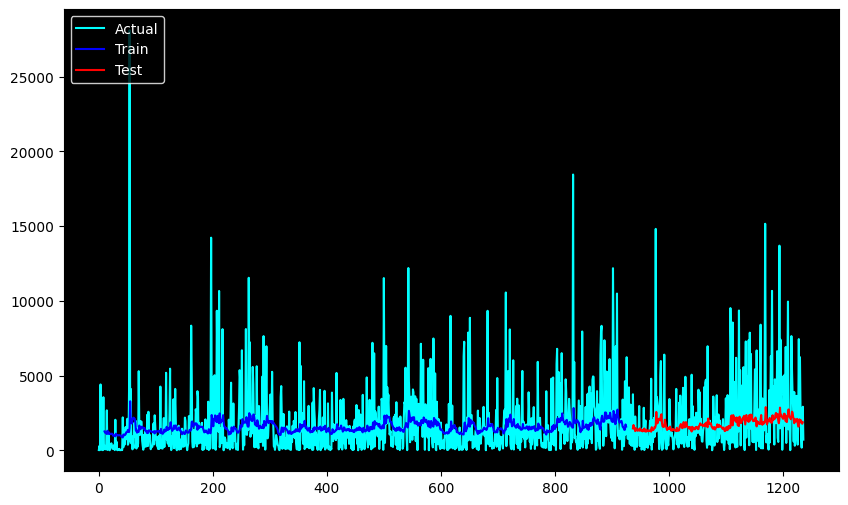

In [91]:
# Plotting baseline and predictions with custom styling
plt.figure(figsize=(10, 6))

# Plotting the baseline and predictions
plt.plot(scaler.inverse_transform(df_final), color='aqua', label='Actual')  # Baseline in aqua
plt.plot(train_plot, color='blue', label='Train')  # Train plot in blue
plt.plot(test_plot, color='red', label='Test')  # Test plot in red

# Setting the background color
plt.gca().set_facecolor('black')  # Set background to black

# Customizing tick colors
plt.xticks(color='black')  # X-axis labels in black
plt.yticks(color='black')  # Y-axis labels in black

# Adding a legend
plt.legend(loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')  # Legend with black background and white text

plt.show()


In [93]:
# Save the model in the native Keras format
model.save('my_model.keras')



In [94]:
# Save the model in HDF5 format
model.save('my_model.h5')
